In [10]:
# Question 1(a) Price data handling of stock universe

import numpy as np
import pandas as pd

In [15]:
#Import csv file into panda dataframe called df_stock.

df_stocks = pd.read_csv('prices.csv')
print(df_stocks)

            date    WMT      GS    XOM     AAPL     IBM     MSFT    BRK.B  \
0     2010-01-04  54.23  173.08  69.15  214.010  132.45   30.950  3311.00   
1     2010-01-05  53.69  176.14  69.42  214.380  130.85   30.960  3327.00   
2     2010-01-06  53.57  174.26  70.02  210.970  130.00   30.770  3310.00   
3     2010-01-07  53.60  177.67  69.80  210.580  129.55   30.452  3323.00   
4     2010-01-08  53.33  174.31  69.52  211.980  130.85   30.660  3322.00   
5     2010-01-11  54.21  171.56  70.30  210.110  129.48   30.270  3325.00   
6     2010-01-12  54.73  167.82  69.95  207.720  130.51   30.070  3300.00   
7     2010-01-13  55.01  169.07  69.67  210.650  130.23   30.350  3300.00   
8     2010-01-14  54.21  168.53  69.68  209.430  132.31   30.960  3298.00   
9     2010-01-15  53.68  165.21  69.11  205.930  131.78   30.860  3247.00   
10    2010-01-19  54.03  166.86  69.27  215.040  134.14   31.100  3332.00   
11    2010-01-20  53.86  167.79  68.03  211.725  130.25   30.585  3476.00   

In [16]:
#  In order to get monthly return for Jan 2010, we copy the start to 31-Dec-2009.

df_stocks.loc[0, 'date'] = '2009-12-31'
df_stocks.head(2)

,date,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT
0,2009-12-31,54.23,173.08,69.15,214.01,132.45,30.95,3311.0,42.85,57.91,58.55
1,2010-01-05,53.69,176.14,69.42,214.38,130.85,30.96,3327.0,43.68,57.83,59.25


In [17]:
# Convert date information to actual datetime format.
df_stocks['date'] = pd.to_datetime(df_stocks['date'])

# Set 'date'column to the index
df_stocks = df_stocks.set_index('date', drop = True)

print(df_stocks.head())

              WMT      GS    XOM    AAPL     IBM    MSFT   BRK.B    JPM  \
date                                                                      
2009-12-31  54.23  173.08  69.15  214.01  132.45  30.950  3311.0  42.85   
2010-01-05  53.69  176.14  69.42  214.38  130.85  30.960  3327.0  43.68   
2010-01-06  53.57  174.26  70.02  210.97  130.00  30.770  3310.0  43.92   
2010-01-07  53.60  177.67  69.80  210.58  129.55  30.452  3323.0  44.79   
2010-01-08  53.33  174.31  69.52  211.98  130.85  30.660  3322.0  44.68   

                X    CAT  
date                      
2009-12-31  57.91  58.55  
2010-01-05  57.83  59.25  
2010-01-06  60.40  59.43  
2010-01-07  60.91  59.67  
2010-01-08  65.34  60.34  


In [5]:
# Notice there is stock split for BRK.B at starting dates.
# Check for BRK.B split dates on the internet.Adjust BRK.B shares 1/50 split on 

split_date = '2010-01-20'
df_stocks.loc[:split_date, "BRK.B"] = df_stocks.loc[:split_date, "BRK.B"] / 50
df_stocks.head(15)

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT
date,,,,,,,,,,
2009-12-31,54.23,173.08,69.15,214.010,132.45,30.950,66.22,42.85,57.91,58.55
2010-01-05,53.69,176.14,69.42,214.380,130.85,30.960,66.54,43.68,57.83,59.25
2010-01-06,53.57,174.26,70.02,210.970,130.00,30.770,66.20,43.92,60.40,59.43
2010-01-07,53.60,177.67,69.80,210.580,129.55,30.452,66.46,44.79,60.91,59.67
2010-01-08,53.33,174.31,69.52,211.980,130.85,30.660,66.44,44.68,65.34,60.34
2010-01-11,54.21,171.56,70.30,210.110,129.48,30.270,66.50,44.53,62.93,64.13
2010-01-12,54.73,167.82,69.95,207.720,130.51,30.070,66.00,43.49,62.93,62.24
2010-01-13,55.01,169.07,69.67,210.650,130.23,30.350,66.00,44.25,63.17,62.33
2010-01-14,54.21,168.53,69.68,209.430,132.31,30.960,65.96,44.69,63.56,61.98


In [6]:
# Question 1(b) - Select year end closing price of GS and X using .loc and isin()

year_ends = ['2013-12-30', '2014-12-30','2015-12-30','2016-12-30','2017-12-29']

print(df_stocks.loc[df_stocks.index.isin(year_ends), ['GS', 'X']])

                GS      X
date                     
2013-12-30  175.73  29.52
2014-12-30  195.71  27.12
2015-12-30  182.01   8.14
2016-12-30  239.45  33.01
2017-12-29  254.76  35.19


In [7]:
# Question 2(a) & 2(b) Obtain the last business day of the month using resample and show stock prices.
#df_stocks_last = df_stocks.resample('BM').last()

df_stocks_last = df_stocks.resample('BM').last()

df_stocks_last

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT
date,,,,,,,,,,
2009-12-31,54.23,173.08,69.15,214.0100,132.45,30.9500,66.22,42.85,57.91,58.55
2010-01-29,53.43,148.72,64.43,192.0630,122.39,28.1800,76.43,38.94,44.43,52.24
2010-02-26,54.07,156.35,65.00,204.6200,127.16,28.6700,80.13,41.97,52.94,57.05
2010-03-31,55.60,170.63,66.98,235.0000,128.25,29.2875,81.27,44.70,63.52,62.85
2010-04-30,53.64,145.20,67.77,261.0900,129.00,30.5350,77.00,42.58,54.66,68.09
2010-05-31,50.56,144.26,60.46,256.8800,125.26,25.8000,70.55,39.58,47.21,60.76
2010-06-30,48.07,131.27,57.07,251.5300,123.48,23.0100,79.69,36.61,38.55,60.07
2010-07-30,51.19,150.82,59.68,257.2500,128.40,25.8100,78.12,40.28,44.33,69.75
2010-08-31,50.14,136.93,59.11,243.1000,123.13,23.4650,78.78,36.36,42.49,65.16


In [8]:
# Question 2(c) Calculate the monthly returns of the stocks using pct_change()

df_monthly_returns = df_stocks_last.pct_change()

#print(df_monthly_returns)
df_monthly_returns.head() 

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT
date,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,-0.014752,-0.140744,-0.068257,-0.102551,-0.075953,-0.089499,0.154183,-0.091249,-0.232775,-0.107771
2010-02-26,0.011978,0.051304,0.008847,0.065380,0.038974,0.017388,0.048410,0.077812,0.191537,0.092075
2010-03-31,0.028297,0.091334,0.030462,0.148470,0.008572,0.021538,0.014227,0.065046,0.199849,0.101665
2010-04-30,-0.035252,-0.149036,0.011795,0.111021,0.005848,0.042595,-0.052541,-0.047427,-0.139484,0.083373


In [9]:
# Question 2(d) Monthly returns of WMT and JPM in the first 6 months of 2014

df_monthly_returns.loc['2014-01-31':'2014-06-30', ['WMT','JPM']] 

print(df_monthly_returns.loc['2014-01-31':'2014-06-30', ['WMT','JPM']])

                 WMT       JPM
date                          
2014-01-31 -0.050959 -0.053352
2014-02-28  0.000268  0.026373
2014-03-31  0.023159  0.068462
2014-04-30  0.042915 -0.077911
2014-05-30 -0.036884 -0.007324
2014-06-30 -0.022144  0.036890


In [10]:
# Question 3(a) Determine the stock to acquire for your strategy at the end of each month.

# use idxmax to return the column label for the maximum value in the row
df_monthly_returns['BUY'] = df_monthly_returns.idxmax(axis=1)

#print(df_monthly_returns)
df_monthly_returns 

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,BUY
date,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,-0.014752,-0.140744,-0.068257,-0.102551,-0.075953,-0.089499,0.154183,-0.091249,-0.232775,-0.107771,BRK.B
2010-02-26,0.011978,0.051304,0.008847,0.065380,0.038974,0.017388,0.048410,0.077812,0.191537,0.092075,X
2010-03-31,0.028297,0.091334,0.030462,0.148470,0.008572,0.021538,0.014227,0.065046,0.199849,0.101665,X
2010-04-30,-0.035252,-0.149036,0.011795,0.111021,0.005848,0.042595,-0.052541,-0.047427,-0.139484,0.083373,AAPL
2010-05-31,-0.057420,-0.006474,-0.107865,-0.016125,-0.028992,-0.155068,-0.083766,-0.070456,-0.136297,-0.107652,GS
2010-06-30,-0.049248,-0.090046,-0.056070,-0.020827,-0.014210,-0.108140,0.129554,-0.075038,-0.183436,-0.011356,BRK.B
2010-07-30,0.064905,0.148930,0.045733,0.022741,0.039845,0.121686,-0.019701,0.100246,0.149935,0.161145,CAT
2010-08-31,-0.020512,-0.092097,-0.009551,-0.055005,-0.041044,-0.090856,0.008449,-0.097319,-0.041507,-0.065806,BRK.B


In [11]:
# Question 3(b) Print first five dates where XOM is selected for the strategy

df_monthly_returns.loc[df_monthly_returns['BUY'] == 'XOM']

#print(df_monthly_returns.loc[df_monthly_returns['BUY'] == 'XOM'])

print(df_monthly_returns.loc[df_monthly_returns['BUY'] == 'XOM', ['BUY', 'XOM']])

            BUY       XOM
date                     
2012-04-30  XOM -0.004497
2012-06-29  XOM  0.088261
2013-06-28  XOM -0.001326
2017-09-29  XOM  0.074021
2018-04-30  XOM  0.042086


In [12]:
# Create starting variables. 

# Funds to invest
invested = 1000

# Start investing date
date_start = '2010-02-01'

In [13]:
# Question 4(a) Obtain daily prices of the stock you have chosen for your strategy for the entire back testing period

# Use forward fill 'ffill' to fill in the days of the month with the stock symbol that will be used on each day.
df_portfolio = df_monthly_returns['BUY'].reindex(df_stocks.index, method='ffill').shift(1)

# Filter portfolio to the start date
df_portfolio = df_portfolio.loc[date_start:]
df_portfolio.head(20)

date
2010-02-01    BRK.B
2010-02-02    BRK.B
2010-02-03    BRK.B
2010-02-04    BRK.B
2010-02-05    BRK.B
2010-02-08    BRK.B
2010-02-09    BRK.B
2010-02-10    BRK.B
2010-02-11    BRK.B
2010-02-12    BRK.B
2010-02-16    BRK.B
2010-02-17    BRK.B
2010-02-18    BRK.B
2010-02-19    BRK.B
2010-02-22    BRK.B
2010-02-23    BRK.B
2010-02-24    BRK.B
2010-02-25    BRK.B
2010-02-26    BRK.B
2010-03-01        X
Name: BUY, dtype: object

In [14]:
# Question 4(a) Obtain daily prices of the stock you have chosen for your strategy for the entire back testing period

# Connect dataframe df_stocks containing pricing data to the df_portfolio with stock selection data using .join()

df_portfolio = df_stocks.join(df_portfolio)
df_portfolio = df_portfolio.loc[date_start:, :]
df_portfolio.head(20)

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,BUY
date,,,,,,,,,,,
2010-02-01,53.48,153.13,66.18,194.730,124.67,28.410,75.41,39.63,47.32,52.94,BRK.B
2010-02-02,53.49,156.94,66.96,195.860,125.53,28.460,75.51,40.55,48.05,53.55,BRK.B
2010-02-03,54.27,157.23,66.60,199.230,125.66,28.630,74.36,40.29,46.82,53.39,BRK.B
2010-02-04,52.97,150.68,64.72,192.050,123.00,27.840,72.61,38.35,44.07,51.40,BRK.B
2010-02-05,53.45,154.16,64.38,195.460,122.97,28.020,73.57,38.30,44.73,51.75,BRK.B
2010-02-08,52.93,151.10,64.35,194.120,121.88,27.720,74.23,37.70,44.09,50.78,BRK.B
2010-02-09,53.25,152.49,65.20,196.190,123.21,28.010,74.53,38.39,46.01,53.53,BRK.B
2010-02-10,53.24,153.63,64.85,195.116,122.81,27.990,74.42,38.87,44.37,53.15,BRK.B
2010-02-11,53.08,154.05,65.24,198.670,123.73,28.120,76.69,39.02,47.01,56.15,BRK.B


In [15]:
# Create two new columns: "units" for the number of shares and "value" for the market value

df_portfolio['units'] = 0
df_portfolio['value'] = invested
df_portfolio.head(3)

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,BUY,units,value
date,,,,,,,,,,,,,
2010-02-01,53.48,153.13,66.18,194.73,124.67,28.41,75.41,39.63,47.32,52.94,BRK.B,0,1000
2010-02-02,53.49,156.94,66.96,195.86,125.53,28.46,75.51,40.55,48.05,53.55,BRK.B,0,1000
2010-02-03,54.27,157.23,66.60,199.23,125.66,28.63,74.36,40.29,46.82,53.39,BRK.B,0,1000


In [16]:
# Question 4(b) Calculate the units of stocks you will purchase at the first trading date of each month 
# Question 4(c) Hence, determine the value of your strategy on every single calendar date.  

# Use iterrows to iterate through the dataframe and set units and market values.

for d, r in df_portfolio.iterrows():
    # Establish price per share for stock in 'BUY' column
    price = r[r['BUY']]
    
     # Check the first date and set unit
    if d == df_portfolio.index[0]:
        df_portfolio.loc[d, 'units'] = r['value'] / price
     
    # Check to see if the stock is the same as the previous period,then carry forward units and reset market value
    elif r['BUY'] == prev_buy:
        df_portfolio.loc[d, 'units'] = prev_units
        df_portfolio.loc[d, 'value'] = prev_units * price
    
    # Check if the stock symbol has changed. If so, create new units for new stock and carry forward market value
    elif r['BUY'] != prev_buy:
        df_portfolio.loc[d, 'units'] = prev_value / price
        df_portfolio.loc[d, 'value'] = prev_value        
    
    prev_buy = df_portfolio.loc[d, 'BUY']
    prev_units = df_portfolio.loc[d, 'units']
    prev_value = df_portfolio.loc[d, 'value'] 
    print(prev_buy)
    print(prev_units)
    print(prev_value)

BRK.B
13.260840737302745
1000
BRK.B
13.260840737302745
1001.3260840737304
BRK.B
13.260840737302745
986.0761172258321
BRK.B
13.260840737302745
962.8696459355523
BRK.B
13.260840737302745
975.6000530433629
BRK.B
13.260840737302745
984.3522079299828
BRK.B
13.260840737302745
988.3304601511736
BRK.B
13.260840737302745
986.8717676700703
BRK.B
13.260840737302745
1016.9738761437475
BRK.B
13.260840737302745
1019.7586526985812
BRK.B
13.260840737302745
1008.4869380718737
BRK.B
13.260840737302745
1011.1391062193343
BRK.B
13.260840737302745
1016.3108341068823
BRK.B
13.260840737302745
1044.158599655218
BRK.B
13.260840737302745
1055.0324890598065
BRK.B
13.260840737302745
1049.5955443575124
BRK.B
13.260840737302745
1056.6237899482828
BRK.B
13.260840737302745
1052.910754541838
BRK.B
13.260840737302745
1062.5911682800688
X
19.4685080300489
1062.5911682800688
X
19.4685080300489
1076.608494061704
X
19.4685080300489
1097.634482734157
X
19.4685080300489
1102.6962948219696
X
19.4685080300489
1146.69512296988


In [17]:
#Question 4(d) Print the value of your strategy on 31-Jan-2010, 30-Jan-2011, 31-Dec-2014, 15-Sep-2016 and 31-Dec-2018.

year_ends = ['2010-01-31','2011-01-30','2014-12-31','2016-09-15', '2018-12-31']

print(df_portfolio.loc[df_portfolio.index.isin(year_ends), 'value'])

date
2014-12-31    361.419232
2016-09-15    554.054997
2018-12-31    474.949114
Name: value, dtype: float64


State clearly any assumptions, if any, you have made in your computations.

- Key in one extra data being the start date to 31-Dec-2009.
- No output generated on '2010-01-31' and '2011-01-30' as it is not the last trading date. Technically it should have obtained the value on the last trading date.
- Assume accurate data provided.
- Assume no dividends.
- Assume pure liquidity and filling of orders. 
- Assuming can purchase at the close price on the next day. 

In [18]:
# Question 5(a) Calculate your wealth if you have chosen to use the $1,000 to buy and hold the stocks in the stock universe  
# from 1-Jan-2010 to 31-Dec-2018.

# Portfolio benchmarking
import ffn

# Rebase start date is first trading date 1-Feb-2010, sum the rows to get the benchmark.
count_stocks = df_stocks.shape[1]
invest_per_stock = invested / count_stocks
df_buy_hold = df_stocks.loc['2010-02-01':,:].rebase(invest_per_stock)

# Create buy and hold benchmark
df_buy_hold['bh_benchmark'] = df_buy_hold.sum(axis=1)
df_buy_hold.head()

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,bh_benchmark
date,,,,,,,,,,,
2010-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1000.000000
2010-02-02,100.018699,102.488082,101.178604,100.580291,100.689821,100.175994,100.132608,102.321474,101.542688,101.152248,1010.280509
2010-02-03,101.477188,102.677464,100.634633,102.310892,100.794096,100.774375,98.607612,101.665405,98.943364,100.850019,1008.735048
2010-02-04,99.046372,98.400052,97.793895,98.623735,98.660464,97.993664,96.286965,96.770124,93.131868,97.091046,973.798186
2010-02-05,99.943904,100.672631,97.280145,100.374878,98.636400,98.627244,97.560005,96.643957,94.526627,97.752172,982.017964


In [19]:
# Question 5(a) Calculate your wealth if you have chosen to use the $1,000 to buy and hold the stocks in the stock universe  
# from 1-Jan-2010 to 31-Dec-2018. 

df_buy_hold.tail()

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,bh_benchmark
date,,,,,,,,,,,
2018-12-24,160.471204,102.102788,98.987610,75.401838,86.283789,331.326998,248.985546,232.500631,36.496196,220.910465,1593.467065
2018-12-26,169.053852,106.399791,103.717135,80.711755,89.347878,353.959873,261.994430,242.139793,38.884193,235.663015,1681.871715
2018-12-27,171.260284,108.019330,104.170444,80.187953,91.264939,356.142203,265.375945,244.865001,38.799662,239.270873,1699.356635
2018-12-28,172.270007,106.465095,103.006951,80.229035,90.663351,353.361492,267.975070,244.335100,38.567202,237.268606,1694.141909
2018-12-31,174.177263,109.090315,103.037171,81.004468,91.176707,357.514960,270.759846,246.328539,38.546069,240.026445,1711.661783


In [20]:
# Question 5(b) Make use of Python plotting capabilities to visualize how your wealth would fluctuate in wealth 
# if you have bought and hold AAPL, IBM or WMT separately for the entire back testing period

# Bring the value of the strategy and the benchmark together using .join().
df_portfolio = df_portfolio.join(df_buy_hold['bh_benchmark'])

df_portfolio.head()

,WMT,GS,XOM,AAPL,IBM,MSFT,BRK.B,JPM,X,CAT,BUY,units,value,bh_benchmark
date,,,,,,,,,,,,,,
2010-02-01,53.48,153.13,66.18,194.73,124.67,28.41,75.41,39.63,47.32,52.94,BRK.B,13.260841,1000.000000,1000.000000
2010-02-02,53.49,156.94,66.96,195.86,125.53,28.46,75.51,40.55,48.05,53.55,BRK.B,13.260841,1001.326084,1010.280509
2010-02-03,54.27,157.23,66.60,199.23,125.66,28.63,74.36,40.29,46.82,53.39,BRK.B,13.260841,986.076117,1008.735048
2010-02-04,52.97,150.68,64.72,192.05,123.00,27.84,72.61,38.35,44.07,51.40,BRK.B,13.260841,962.869646,973.798186
2010-02-05,53.45,154.16,64.38,195.46,122.97,28.02,73.57,38.30,44.73,51.75,BRK.B,13.260841,975.600053,982.017964


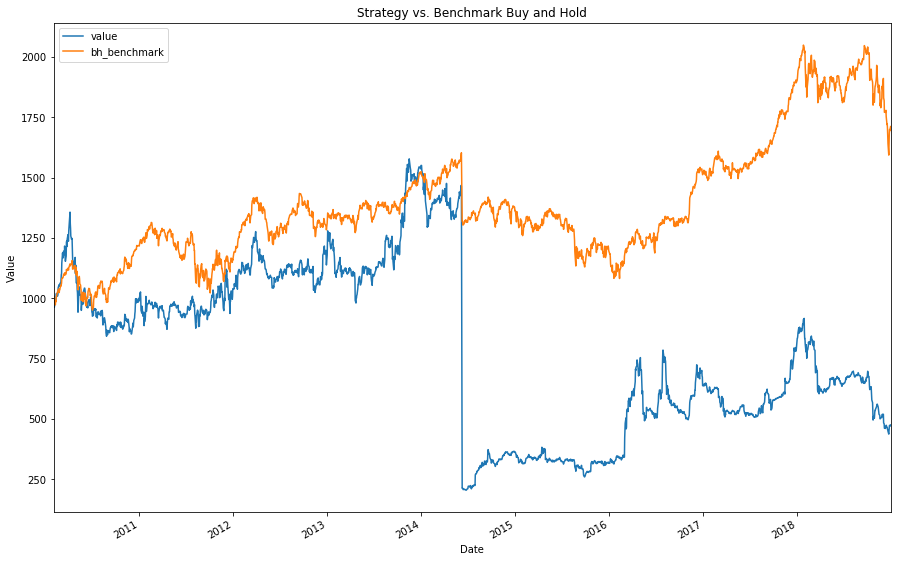

In [21]:
# Plot the value and the benchmark 

%matplotlib inline

import matplotlib.pyplot as plt

df_results = df_portfolio[['value', 'bh_benchmark']]
df_results.plot(figsize=(15,10,))
plt.title("Strategy vs. Benchmark Buy and Hold")
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

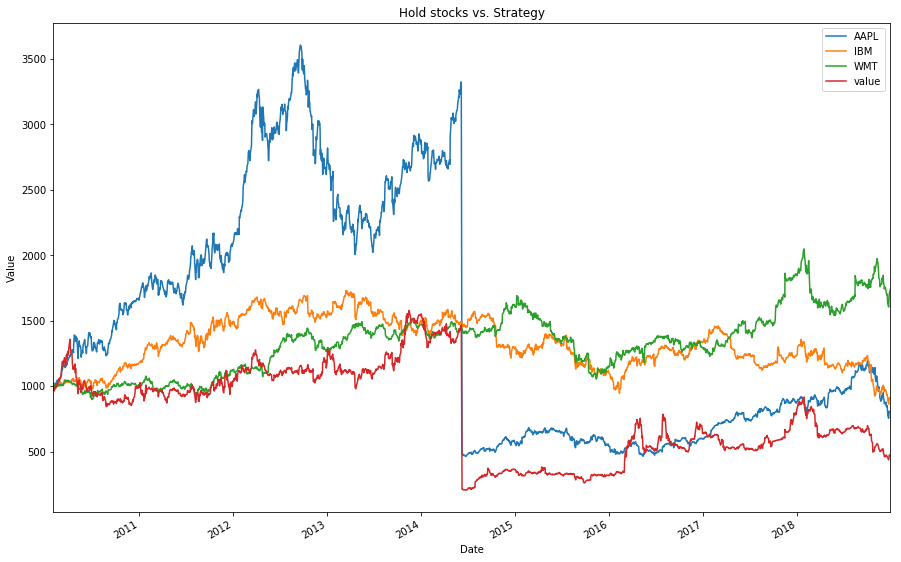

In [22]:
df_results_and_stocks = df_portfolio.loc['2010-02-01':, ['AAPL', 'IBM', 'WMT', 'value']].rebase(invested)
df_results_and_stocks.plot(figsize=(15,10,))
plt.title("Hold stocks vs. Strategy")
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

In [23]:
# Question 5(c) Comment on the performance of your momentum strategy. Explain any anomalies observed in your plot

# Anomalies found for stock 'AAPL' where there is a sudden drop in the plot. It may due to stock split of 'AAPL' 
# happened in between year 2014 and 2015.

# Import from ffn to view the comparison performance metrics
# Sharpe ratio is the measure of risk adjusted return of a financial portfolio. A portflio with higher sharpe ratio
# is considered superior relative to its peers.
# In this strategy has a higher return with a lower sharpe ratio, which means no good. This strategy is volatile.
df_results.calc_stats().stats 

,value,bh_benchmark
start,2010-02-01 00:00:00,2010-02-01 00:00:00
end,2018-12-31 00:00:00,2018-12-31 00:00:00
rf,0,0
total_return,-0.525051,0.711662
cagr,-0.0801523,0.0621657
max_drawdown,-0.870262,-0.324991
calmar,-0.0921013,0.191285
mtd,-0.0854984,-0.0914413
three_month,-0.29265,-0.149021
six_month,-0.264165,-0.061366
